# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as pl

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn import metrics as me
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

2024-11-24 12:09:04.777453: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Split the training set into a training set and a validation set
X_val = X_train[0:10000,:,:]
X_train = X_train[10000:,:,:]
y_val = y_train[0:10000]
y_train = y_train[10000:]

# Reshape the training data tensors so that each image is a vector
X_train = X_train.reshape(50000, 784)
X_val = X_val.reshape(10000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Scale the training data so that pixel intensity lies in [0,1]
X_train /= 255
X_val /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = tf.keras.utils.to_categorical(y_train, n_classes)
Y_val = tf.keras.utils.to_categorical(y_val, n_classes)
Y_test = tf.keras.utils.to_categorical(y_test, n_classes)

50000 train samples
10000 validation samples
10000 test samples


Create the MLP

In [3]:
model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Define some constants and train the MLP. In order to perform the model selection process, you train each model with the train dataset and evaluate it with the validation dataset. The test set remains unseen.

In [4]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_val, Y_val))

Epoch 1/10
391/391 [==============================] - 2s 5ms/step - loss: 0.3124 - accuracy: 0.9123 - val_loss: 0.1826 - val_accuracy: 0.9491
Epoch 2/10
391/391 [==============================] - 1s 4ms/step - loss: 0.1379 - accuracy: 0.9603 - val_loss: 0.1285 - val_accuracy: 0.9626
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 0.0930 - accuracy: 0.9728 - val_loss: 0.0998 - val_accuracy: 0.9694
Epoch 4/10
391/391 [==============================] - 1s 4ms/step - loss: 0.0692 - accuracy: 0.9798 - val_loss: 0.0913 - val_accuracy: 0.9733
Epoch 5/10
391/391 [==============================] - 2s 4ms/step - loss: 0.0537 - accuracy: 0.9837 - val_loss: 0.0869 - val_accuracy: 0.9743
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 0.0426 - accuracy: 0.9870 - val_loss: 0.0803 - val_accuracy: 0.9764
Epoch 7/10
391/391 [==============================] - 2s 4ms/step - loss: 0.0336 - accuracy: 0.9904 - val_loss: 0.0765 - val_accuracy: 0.9766
Epoch 

Show the performance of the model. By observing the performance of your models on the validation set, you will choose a set of hyperparameters for your final model. The test set is still not used at this point.

Validation score: 0.07008454948663712
Validation accuracy: 0.9803000092506409


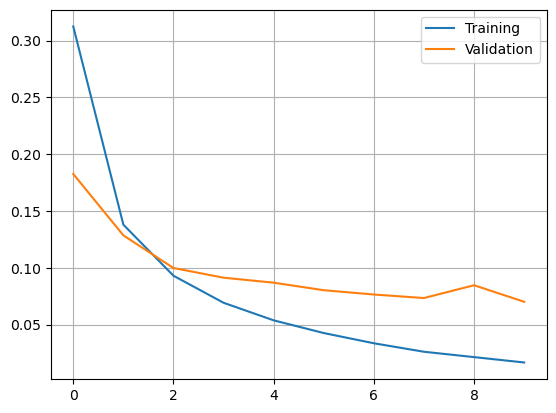

In [5]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Validation')
pl.legend()
pl.grid()

score = model.evaluate(X_val, Y_val, verbose=0)
print('Validation score:', score[0])
print('Validation accuracy:', score[1])

Now that you have chosen your final model, you can finally evaluate its performance using the test set. It is important that the test set remains hidden for your model until this last step in order to have an unbiased estimate of the performance. Therefore, you should not run the following cell until you have chosen your final model.

In [6]:
final_score = model.evaluate(X_test, Y_test, verbose=0)
print('FINAL RESULTS:')
print('Test score:', final_score[0])
print('Test accuracy:', final_score[1])

FINAL RESULTS:
Test score: 0.06541819125413895
Test accuracy: 0.9800999760627747


Confusion matrix

313/313 [==============================] - 1s 2ms/step


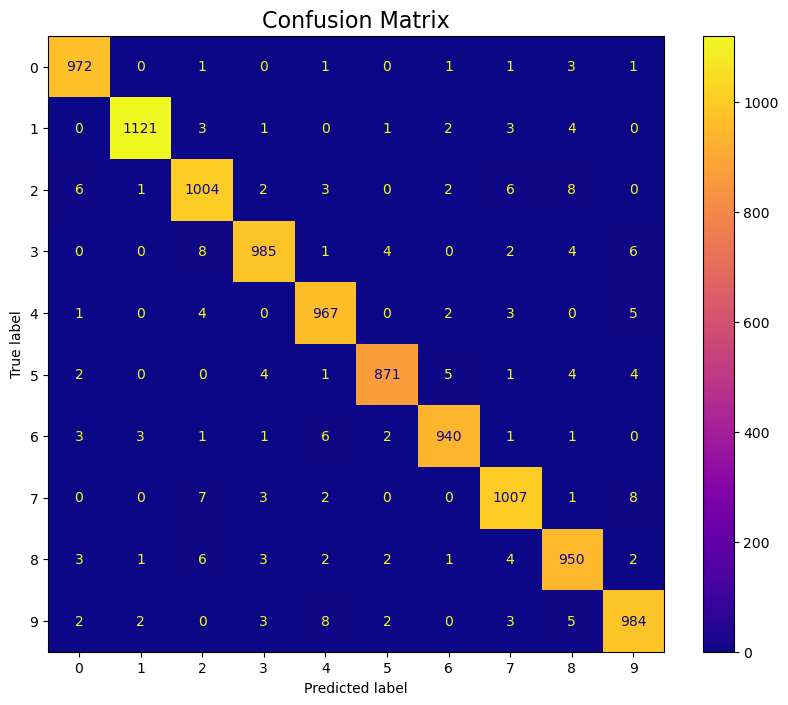

In [8]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = pl.subplots(figsize=(10, 8))
disp.plot(cmap='plasma', ax=ax, values_format='d')
pl.title("Confusion Matrix", fontsize=16)
pl.show()
